## Objective: Apply dimensionality reduction technique – PCA and train a model using principle components instead of training the model using just the raw data

## Import all the necessary libraries

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import scipy.stats as stats
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from scipy.stats import zscore
from sklearn import metrics
from sklearn import svm
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

## Read the data into the notebook

In [ ]:
data = pd.read_csv('vehicle.csv')

In [ ]:
data.head()

compactness  circularity  distance_circularity  radius_ratio  \
0           95         48.0                  83.0         178.0   
1           91         41.0                  84.0         141.0   
2          104         50.0                 106.0         209.0   
3           93         41.0                  82.0         159.0   
4           85         44.0                  70.0         205.0   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0                  72.0                       10          162.0   
1                  57.0                        9          149.0   
2                  66.0                       10          207.0   
3                  63.0                        9          144.0   
4                 103.0                       52          149.0   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0           42.0                    20.0                        159   
1           45.0                    19.0                        143   
2           32.0                    23.0                        158   
3           46.0                    19.0                        143   
4           45.0                    19.0                        144   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0            176.0              379.0                      184.0   
1            170.0              330.0                      158.0   
2            223.0              635.0                      220.0   
3            160.0              309.0                      127.0   
4            241.0              325.0                      188.0   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                         70.0             6.0              16.0   
1                         72.0             9.0              14.0   
2                         73.0            14.0               9.0   
3                         63.0             6.0              10.0   
4                        127.0             9.0              11.0   

   skewness_about.2  hollows_ratio class  
0             187.0            197   van  
1             189.0            199   van  
2             188.0            196   car  
3             199.0            207   van  
4             180.0            183   bus

## Basic EDA
* Find the shape of the data,data type of individual columns
* Check the presence of missing values
* Descriptive stats of numerical columns
* Find the distribution of numerical columns and the asssociated skeweness and presence of outliers 
* Distribution of categorical columns

In [ ]:
data.shape

(846, 19)

The data contains features extracted from the silhouette of vehicles in different angles. Four "Corgie" model vehicles were used for the experiment: a double decker bus, Cheverolet van, Saab 9000 and an Opel Manta 400 cars. This particular combination of vehicles was chosen with the expectation that the bus, van and either one of the cars would be readily distinguishable, but it would be more difficult to distinguish between the cars.

In [ ]:
data.info()  #info about the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   compactness                  846 non-null    int64  
 1   circularity                  841 non-null    float64
 2   distance_circularity         842 non-null    float64
 3   radius_ratio                 840 non-null    float64
 4   pr.axis_aspect_ratio         844 non-null    float64
 5   max.length_aspect_ratio      846 non-null    int64  
 6   scatter_ratio                845 non-null    float64
 7   elongatedness                845 non-null    float64
 8   pr.axis_rectangularity       843 non-null    float64
 9   max.length_rectangularity    846 non-null    int64  
 10  scaled_variance              843 non-null    float64
 11  scaled_variance.1            844 non-null    float64
 12  scaled_radius_of_gyration    844 non-null    float64
 13  scaled_radius_of_gyr

- There are 19 columns in total
    - One target column - 'class'
    - 18 predictor variables
- All columns contain numeric values except class column. Class is a categorical variable.

#### Class is categorical variable, we need to convert categorical text data into numerical data.

In [ ]:
#let's use label encoder to convert categorical varible to numerical
from sklearn.preprocessing import LabelEncoder   # import label encoder

labelencoder = LabelEncoder()  

data['class_id'] = labelencoder.fit_transform(data['class']) # returns label encoded variable(s)

In [ ]:
data['class'].value_counts()

car    429
bus    218
van    199
Name: class, dtype: int64

In [ ]:
data['class_id'].value_counts()

1    429
0    218
2    199
Name: class_id, dtype: int64

In [ ]:
data.head()

compactness  circularity  distance_circularity  radius_ratio  \
0           95         48.0                  83.0         178.0   
1           91         41.0                  84.0         141.0   
2          104         50.0                 106.0         209.0   
3           93         41.0                  82.0         159.0   
4           85         44.0                  70.0         205.0   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0                  72.0                       10          162.0   
1                  57.0                        9          149.0   
2                  66.0                       10          207.0   
3                  63.0                        9          144.0   
4                 103.0                       52          149.0   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0           42.0                    20.0                        159   
1           45.0                    19.0                        143   
2           32.0                    23.0                        158   
3           46.0                    19.0                        143   
4           45.0                    19.0                        144   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0            176.0              379.0                      184.0   
1            170.0              330.0                      158.0   
2            223.0              635.0                      220.0   
3            160.0              309.0                      127.0   
4            241.0              325.0                      188.0   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                         70.0             6.0              16.0   
1                         72.0             9.0              14.0   
2                         73.0            14.0               9.0   
3                         63.0             6.0              10.0   
4                        127.0             9.0              11.0   

   skewness_about.2  hollows_ratio class  class_id  
0             187.0            197   van         2  
1             189.0            199   van         2  
2             188.0            196   car         1  
3             199.0            207   van         2  
4             180.0            183   bus         0

#### =>Now we have convetred target variable class to contain numeric values using new column called class_id
#### => class_id related to original class variable in following way:
        class     class_id
         bus  =>      0
         car  =>      1
         van  =>      2         

#### Let's check if the data has any missing values. 

In [ ]:
data.isnull().sum()

compactness                    0
circularity                    5
distance_circularity           4
radius_ratio                   6
pr.axis_aspect_ratio           2
max.length_aspect_ratio        0
scatter_ratio                  1
elongatedness                  1
pr.axis_rectangularity         3
max.length_rectangularity      0
scaled_variance                3
scaled_variance.1              2
scaled_radius_of_gyration      2
scaled_radius_of_gyration.1    4
skewness_about                 6
skewness_about.1               1
skewness_about.2               1
hollows_ratio                  0
class                          0
class_id                       0
dtype: int64

There are missing values for following columns:
circularity,
distance_circularity,
radius_ratio,
pr.axis_aspect_ratio,
scatter_ratio,
elongatedness,
pr.axis_rectangularity,
scaled_variance,
scaled_variance.1,
scaled_radius_of_gyration,
scaled_radius_of_gyration.1,
skewness_about,
skewness_about.1,
skewness_about.2

In [ ]:
# Replace NaN values with the mean of the column
data['circularity'].fillna(data.circularity.median(), inplace = True)
data['distance_circularity'].fillna(data.distance_circularity.median(), inplace = True)
data['radius_ratio'].fillna(data.radius_ratio.median(), inplace = True)
data['pr.axis_aspect_ratio'].fillna(data['pr.axis_aspect_ratio'].median(), inplace = True)
data['scatter_ratio'].fillna(data.scatter_ratio.median(), inplace = True)
data['elongatedness'].fillna(data.elongatedness.median(), inplace = True)
data['pr.axis_rectangularity'].fillna(data['pr.axis_rectangularity'].median(), inplace = True)
data['scaled_variance'].fillna(data.scaled_variance.median(), inplace = True)
data['scaled_variance.1'].fillna(data['scaled_variance.1'].median(), inplace = True)
data['scaled_radius_of_gyration'].fillna(data.scaled_radius_of_gyration.median(), inplace = True)
data['scaled_radius_of_gyration.1'].fillna(data['scaled_radius_of_gyration.1'].median(), inplace = True)
data['skewness_about'].fillna(data.skewness_about.median(), inplace = True)
data['skewness_about.1'].fillna(data['skewness_about.1'].median(), inplace = True)
data['skewness_about.2'].fillna(data['skewness_about.2'].median(), inplace = True)

In [ ]:
data.isnull().sum()

compactness                    0
circularity                    0
distance_circularity           0
radius_ratio                   0
pr.axis_aspect_ratio           0
max.length_aspect_ratio        0
scatter_ratio                  0
elongatedness                  0
pr.axis_rectangularity         0
max.length_rectangularity      0
scaled_variance                0
scaled_variance.1              0
scaled_radius_of_gyration      0
scaled_radius_of_gyration.1    0
skewness_about                 0
skewness_about.1               0
skewness_about.2               0
hollows_ratio                  0
class                          0
class_id                       0
dtype: int64

#### We have taken care of all the missing values

#### Let's standardize column names for easier processing of data:

In [ ]:
#before processing column names:
print(data.columns)

data = data.rename(columns={'pr.axis_aspect_ratio': 'pr_axis_aspect_ratio', 'max.length_aspect_ratio' : 'max_length_aspect_ratio', 'pr.axis_rectangularity' : 'pr_axis_rectangularity', 'max.length_rectangularity' : 'max_length_rectangularity',
                           'scaled_variance.1' : 'scaled_variance_1', 'scaled_radius_of_gyration.1' : 'scaled_radius_of_gyration_1', 'skewness_about.1' : 'skewness_about_1',
                           'skewness_about.2' : 'skewness_about_2'})
#after modifying some of the column names
print(data.columns)

Index(['compactness', 'circularity', 'distance_circularity', 'radius_ratio',
       'pr.axis_aspect_ratio', 'max.length_aspect_ratio', 'scatter_ratio',
       'elongatedness', 'pr.axis_rectangularity', 'max.length_rectangularity',
       'scaled_variance', 'scaled_variance.1', 'scaled_radius_of_gyration',
       'scaled_radius_of_gyration.1', 'skewness_about', 'skewness_about.1',
       'skewness_about.2', 'hollows_ratio', 'class', 'class_id'],
      dtype='object')
Index(['compactness', 'circularity', 'distance_circularity', 'radius_ratio',
       'pr_axis_aspect_ratio', 'max_length_aspect_ratio', 'scatter_ratio',
       'elongatedness', 'pr_axis_rectangularity', 'max_length_rectangularity',
       'scaled_variance', 'scaled_variance_1', 'scaled_radius_of_gyration',
       'scaled_radius_of_gyration_1', 'skewness_about', 'skewness_about_1',
       'skewness_about_2', 'hollows_ratio', 'class', 'class_id'],
      dtype='object')


In [ ]:
data.describe().T

count        mean         std    min     25%  \
compactness                  846.0   93.678487    8.234474   73.0   87.00   
circularity                  846.0   44.823877    6.134272   33.0   40.00   
distance_circularity         846.0   82.100473   15.741569   40.0   70.00   
radius_ratio                 846.0  168.874704   33.401356  104.0  141.00   
pr_axis_aspect_ratio         846.0   61.677305    7.882188   47.0   57.00   
max_length_aspect_ratio      846.0    8.567376    4.601217    2.0    7.00   
scatter_ratio                846.0  168.887707   33.197710  112.0  147.00   
elongatedness                846.0   40.936170    7.811882   26.0   33.00   
pr_axis_rectangularity       846.0   20.580378    2.588558   17.0   19.00   
max_length_rectangularity    846.0  147.998818   14.515652  118.0  137.00   
scaled_variance              846.0  188.596927   31.360427  130.0  167.00   
scaled_variance_1            846.0  439.314421  176.496341  184.0  318.25   
scaled_radius_of_gyration    846.0  174.706856   32.546277  109.0  149.00   
scaled_radius_of_gyration_1  846.0   72.443262    7.468734   59.0   67.00   
skewness_about               846.0    6.361702    4.903244    0.0    2.00   
skewness_about_1             846.0   12.600473    8.930962    0.0    5.00   
skewness_about_2             846.0  188.918440    6.152247  176.0  184.00   
hollows_ratio                846.0  195.632388    7.438797  181.0  190.25   
class_id                     846.0    0.977541    0.702130    0.0    0.00   

                               50%     75%     max  
compactness                   93.0  100.00   119.0  
circularity                   44.0   49.00    59.0  
distance_circularity          80.0   98.00   112.0  
radius_ratio                 167.0  195.00   333.0  
pr_axis_aspect_ratio          61.0   65.00   138.0  
max_length_aspect_ratio        8.0   10.00    55.0  
scatter_ratio                157.0  198.00   265.0  
elongatedness                 43.0   46.00    61.0  
pr_axis_rectangularity        20.0   23.00    29.0  
max_length_rectangularity    146.0  159.00   188.0  
scaled_variance              179.0  217.00   320.0  
scaled_variance_1            363.5  586.75  1018.0  
scaled_radius_of_gyration    173.5  198.00   268.0  
scaled_radius_of_gyration_1   71.5   75.00   135.0  
skewness_about                 6.0    9.00    22.0  
skewness_about_1              11.0   19.00    41.0  
skewness_about_2             188.0  193.00   206.0  
hollows_ratio                197.0  201.00   211.0  
class_id                       1.0    1.00     2.0

### Observations:

* Data is positively skewed for below columns: 
  1. distance_circularity
  2. scatter_ratio
  3. max_length_rectangularity
  4. scaled_variance
  5. scaled_variance_1
  6. scaled_radius_of_gyration
  7. scaled_radius_of_gyration_1
  8. skewness_about_1

* Data is negatively skewed for below columns:
  1. elongatedness
  2. hollows_ratio

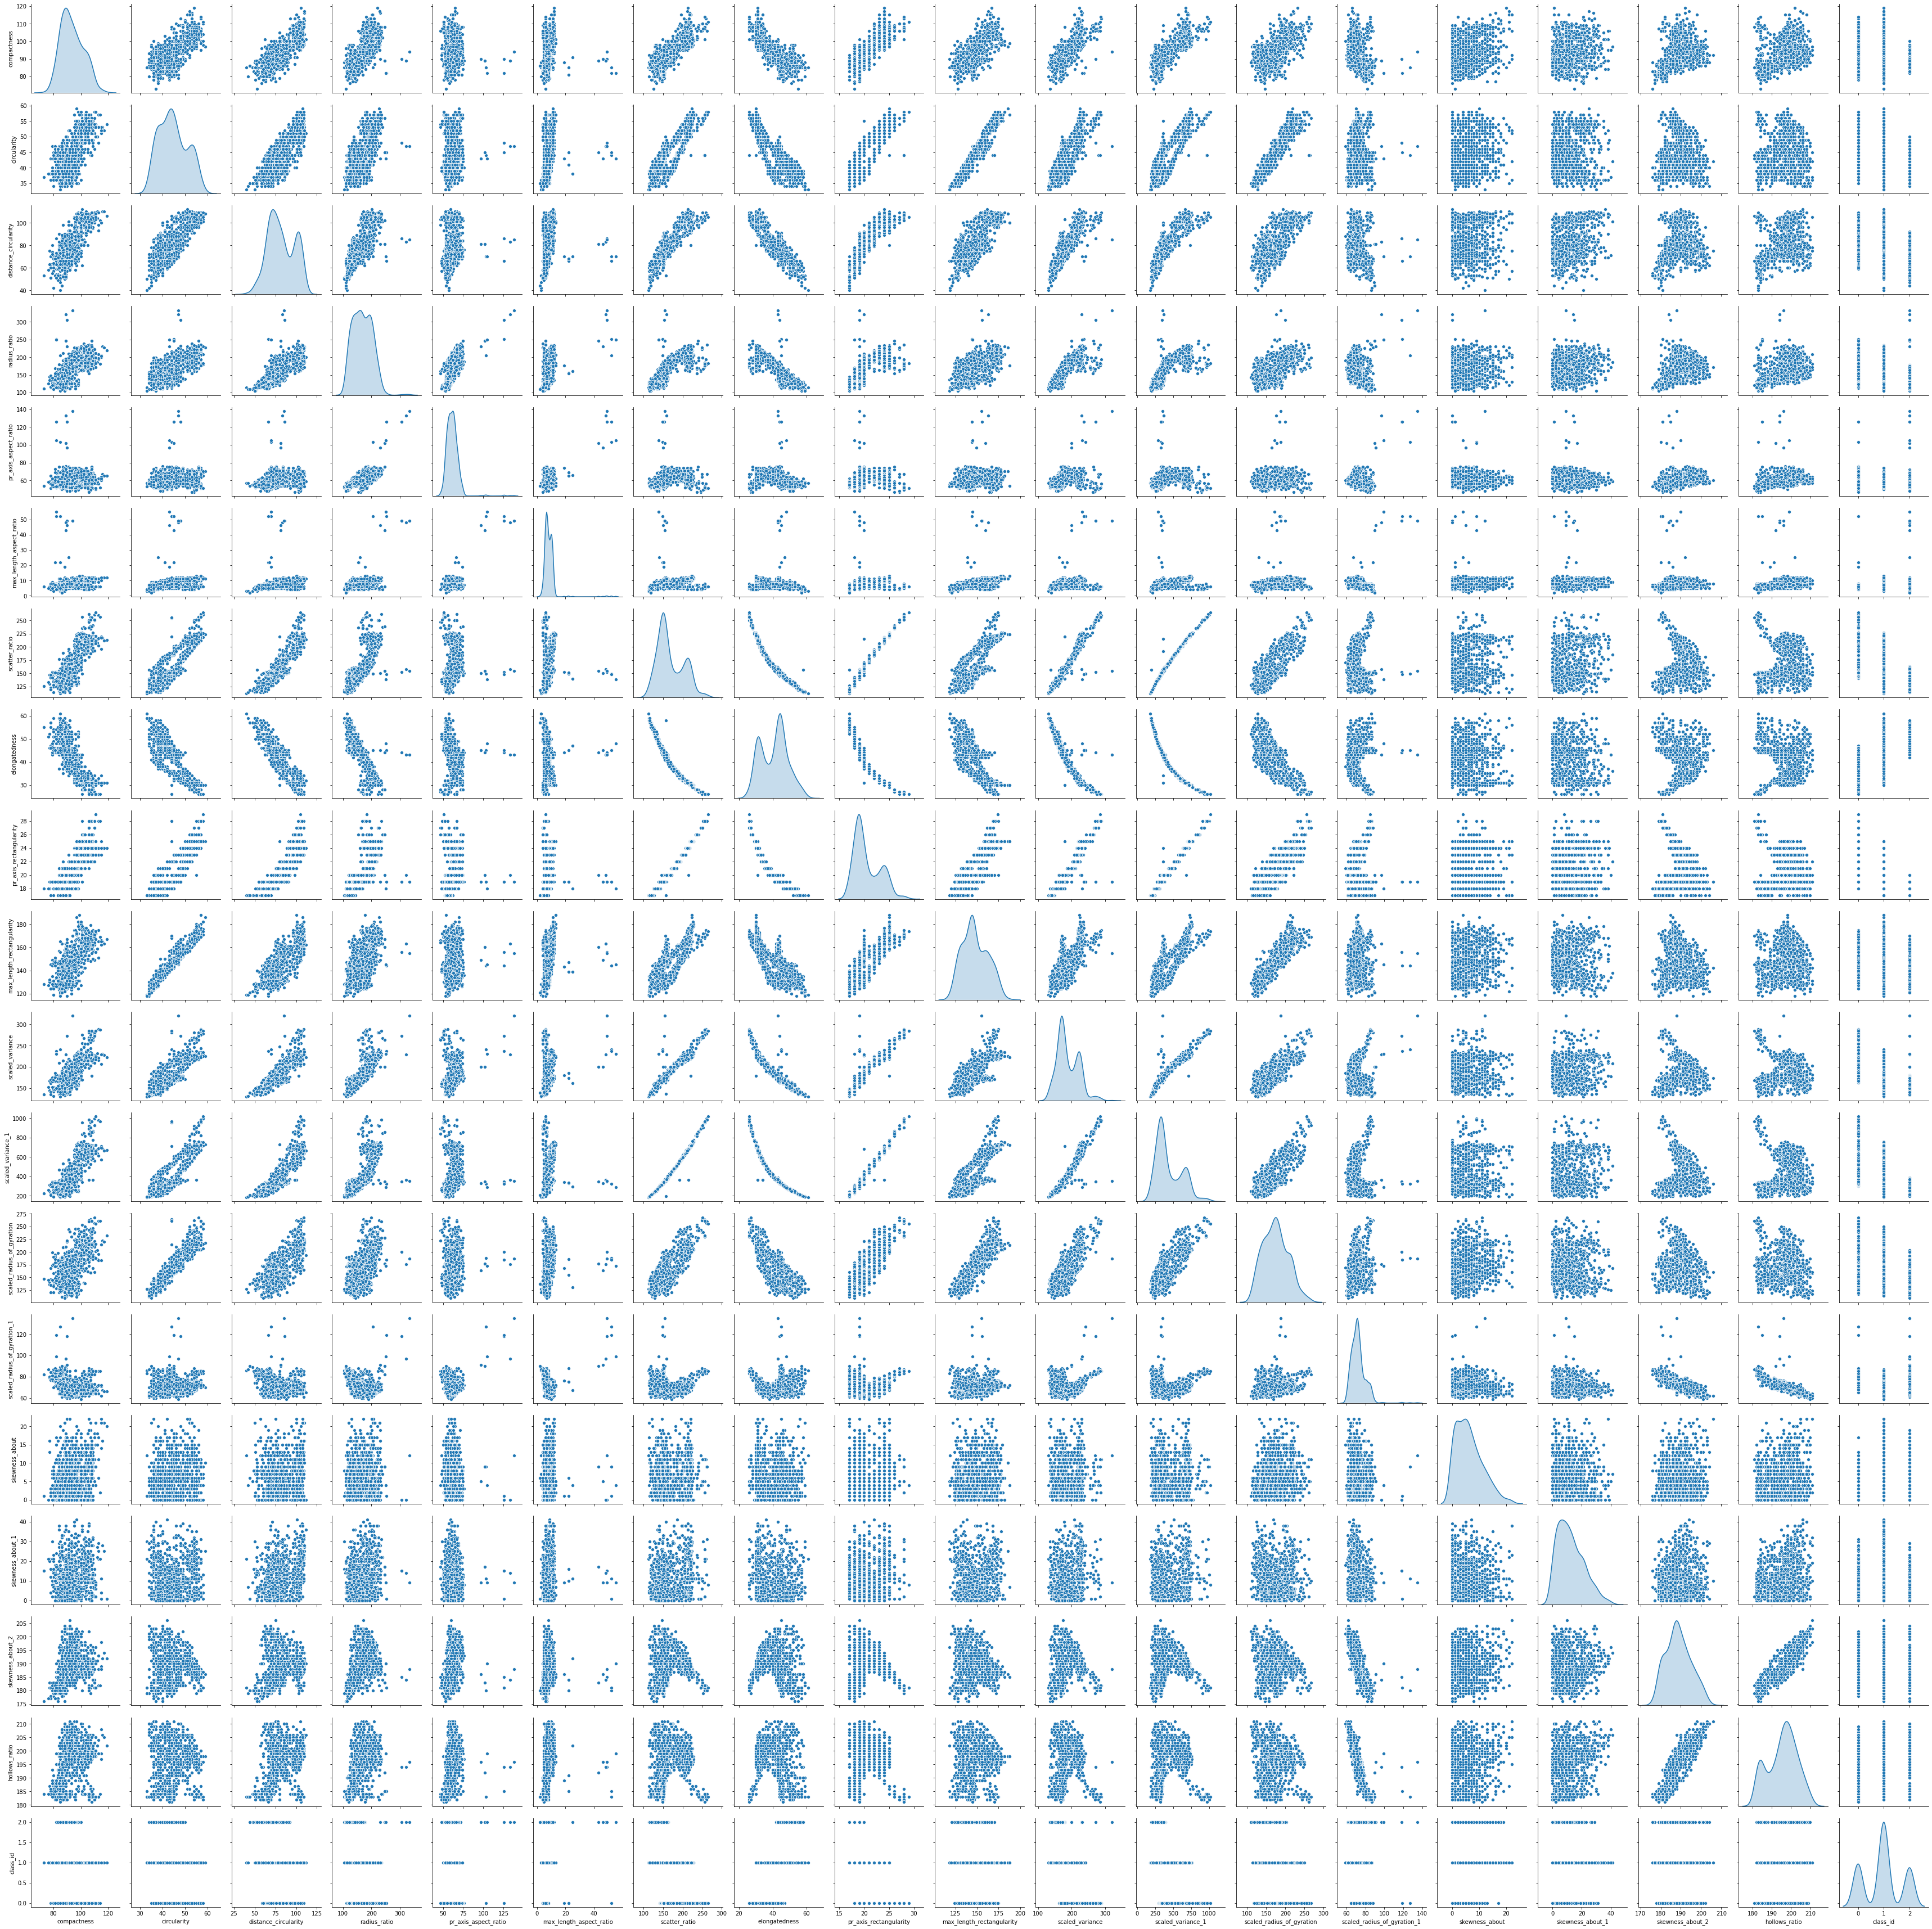

In [ ]:
data_df = data.drop(columns=['class']) #dropping the target variable which contains non numeric data
sns.pairplot(data_df, diag_kind='kde')

### Univariate analysis

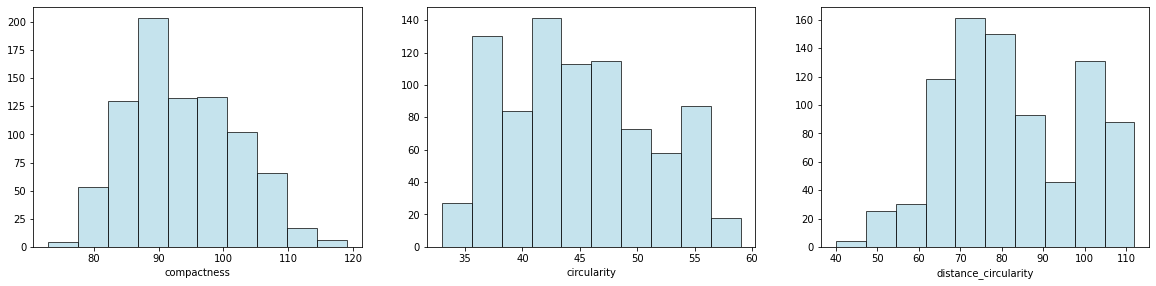

In [ ]:
#Plots to see the distribution of the continuous features individually

plt.figure(figsize= (20,15))
plt.subplot(3,3,1)
plt.hist(data.compactness, color='lightblue', edgecolor = 'black', alpha = 0.7)
plt.xlabel('compactness')

plt.subplot(3,3,2)
plt.hist(data.circularity, color='lightblue', edgecolor = 'black', alpha = 0.7)
plt.xlabel('circularity')

plt.subplot(3,3,3)
plt.hist(data.distance_circularity, color='lightblue', edgecolor = 'black', alpha = 0.7)
plt.xlabel('distance_circularity')

plt.show()

Data in Column distance_circularity is positvely skewed

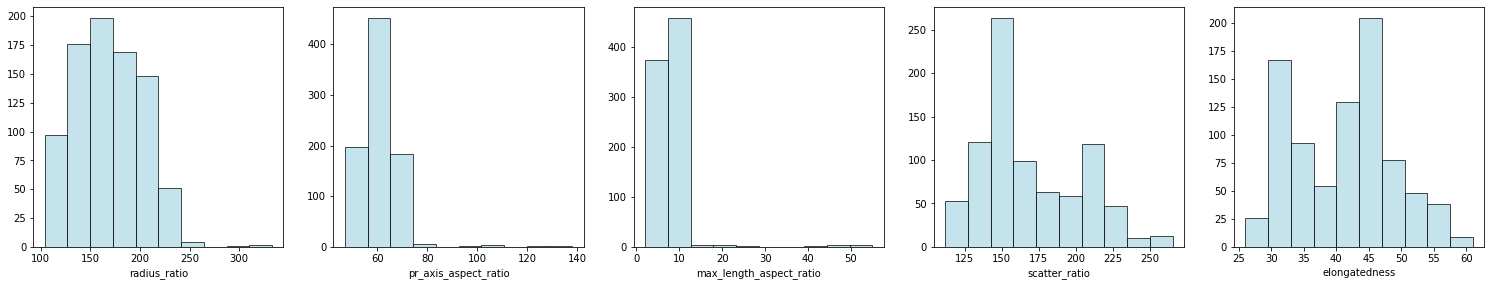

In [ ]:
plt.figure(figsize= (26,15))
plt.subplot(3,5,1)
plt.hist(data.radius_ratio, color='lightblue', edgecolor = 'black', alpha = 0.7)
plt.xlabel('radius_ratio')

plt.subplot(3,5,2)
plt.hist(data.pr_axis_aspect_ratio, color='lightblue', edgecolor = 'black', alpha = 0.7)
plt.xlabel('pr_axis_aspect_ratio')

plt.subplot(3,5,3)
plt.hist(data.max_length_aspect_ratio, color='lightblue', edgecolor = 'black', alpha = 0.7)
plt.xlabel('max_length_aspect_ratio')

plt.subplot(3,5,4)
plt.hist(data.scatter_ratio, color='lightblue', edgecolor = 'black', alpha = 0.7)
plt.xlabel('scatter_ratio')

plt.subplot(3,5,5)
plt.hist(data.elongatedness, color='lightblue', edgecolor = 'black', alpha = 0.7)
plt.xlabel('elongatedness')

plt.show()

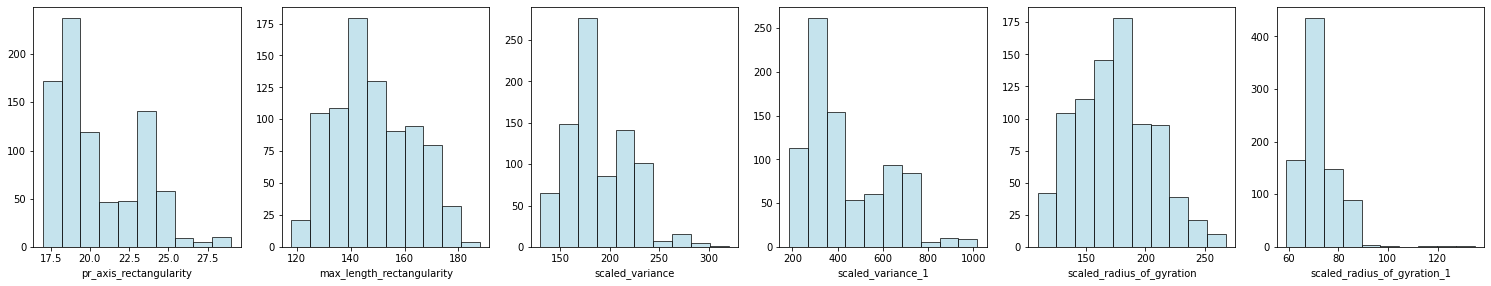

In [ ]:
plt.figure(figsize= (26,15))
plt.subplot(3,6,1)
plt.hist(data.pr_axis_rectangularity, color='lightblue', edgecolor = 'black', alpha = 0.7)
plt.xlabel('pr_axis_rectangularity')

plt.subplot(3,6,2)
plt.hist(data.max_length_rectangularity, color='lightblue', edgecolor = 'black', alpha = 0.7)
plt.xlabel('max_length_rectangularity')

plt.subplot(3,6,3)
plt.hist(data.scaled_variance, color='lightblue', edgecolor = 'black', alpha = 0.7)
plt.xlabel('scaled_variance')

plt.subplot(3,6,4)
plt.hist(data.scaled_variance_1, color='lightblue', edgecolor = 'black', alpha = 0.7)
plt.xlabel('scaled_variance_1')

plt.subplot(3,6,5)
plt.hist(data.scaled_radius_of_gyration, color='lightblue', edgecolor = 'black', alpha = 0.7)
plt.xlabel('scaled_radius_of_gyration')

plt.subplot(3,6,6)
plt.hist(data.scaled_radius_of_gyration_1, color='lightblue', edgecolor = 'black', alpha = 0.7)
plt.xlabel('scaled_radius_of_gyration_1')

plt.show()

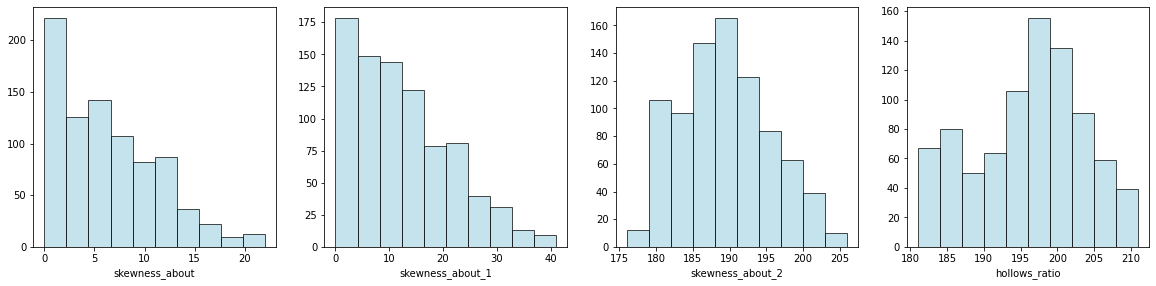

In [ ]:
plt.figure(figsize= (20,15))
plt.subplot(3,4,1)
plt.hist(data.skewness_about, color='lightblue', edgecolor = 'black', alpha = 0.7)
plt.xlabel('skewness_about')

plt.subplot(3,4,2)
plt.hist(data.skewness_about_1, color='lightblue', edgecolor = 'black', alpha = 0.7)
plt.xlabel('skewness_about_1')

plt.subplot(3,4,3)
plt.hist(data.skewness_about_2, color='lightblue', edgecolor = 'black', alpha = 0.7)
plt.xlabel('skewness_about_2')

plt.subplot(3,4,4)
plt.hist(data.hollows_ratio, color='lightblue', edgecolor = 'black', alpha = 0.7)
plt.xlabel('hollows_ratio')

plt.show()

- Data is positively skewed for below columns:
        skewness_about_1

- Data is negatively skewed for below columns:
        hollows_ratio
- skewness_about_2 looks normally distributed.


### Let's check target column distribution.

In [ ]:
data['class'].value_counts()

car    429
bus    218
van    199
Name: class, dtype: int64

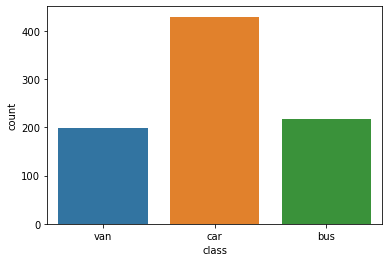

In [ ]:
sns.countplot(x="class",data=data)

#### => In the data car silhouette are present in more number than compared to van and bus. There are 429 observations representing car class, 218 belonging to bus and 199 representing van.

### Bi-variate analysis

#### 1. compactness	vs   class

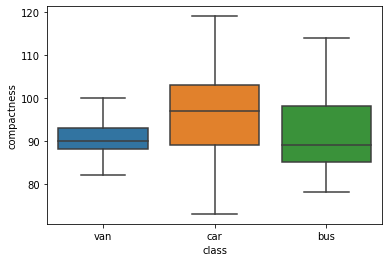

In [ ]:
sns.boxplot(y='compactness', x='class', data=data)

- Compactness varies the most in case of the Car class then in Bus and the least in case of Van.
- Most of cars have compactness between range 90 and 101.
- Most of vans have compactness range between 89 and 92.
- Most of the buses have compactness rage between 88 and 98.

#### 2. circularity	vs   class

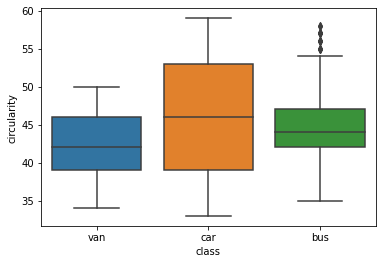

In [ ]:
sns.boxplot(y='circularity', x='class', data=data)

- Circularity varies the most in case of the Car class, lies between 40 and 53 in most of the cases roughly.
- Circularity for most of the Buses is between roughly 43 ad 47
- Circularity for most of the Vans is between roughly 40 ad 46

#### 2. distance_circularity	vs   class

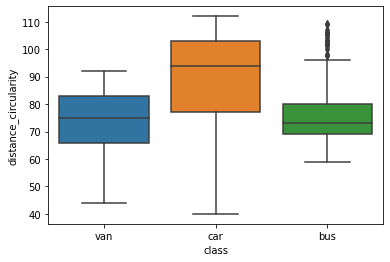

In [ ]:
sns.boxplot(y='distance_circularity', x='class', data=data)

- distance_circularity varies the most in case of the Car class, lies between 80 and 101 in most of the cases roughly.
- distance_circularity for most of the Vans is between roughly 69 ad 81
- distance_circularity for most of the Buses is between roughly 70 ad 80 with some outliers  with value more than 99.

#### 2. distance_circularity	vs   class

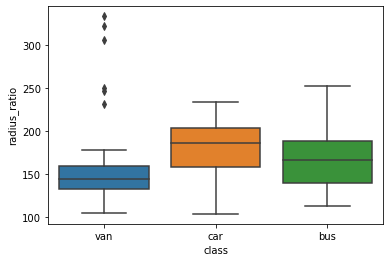

In [ ]:
sns.boxplot(y='radius_ratio', x='class', data=data)

- There are outliers in case of Van radius_ration having values more than 225
- radious_ratio varies the most in case of the Bus class, lies between 150 and 190 in most of the cases roughly.
- radious_ratio for most of the Vans is between roughly 140 ad 150
- radious_ratio for most of the Cars is between roughly 160 ad 200.

#### 2. pr_axis_aspect_ratio	vs   class

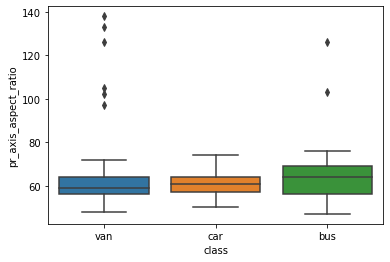

In [ ]:
sns.boxplot(y='pr_axis_aspect_ratio', x='class', data=data)

- There are outliers in case of Van and Bus pr_axis_aspect_ratio having values more than 90 and 100 respectively.
- pr_axis_aspect_ratio lies between 60 and 70 in most of the cases roughly.
- pr_axis_aspect_ratio for most of the Vans and Cars is between roughly 58 and 62.

#### 6. max_length_aspect_ratio	vs   class

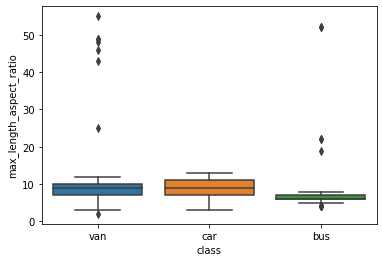

In [ ]:
sns.boxplot(y='max_length_aspect_ratio', x='class', data=data)

- There are outliers in case of Van and Bus max_length_aspect_ratio.
- max_length_aspect_ratio range in case of Bus class is narrow, lies between 8 and 10 in most of the cases roughly.
- max_length_aspect_ratio for most of the Vans is between roughly 7 and 10 and for Cars it's between 8 and 11.

#### 7. scatter_ratio	vs   class

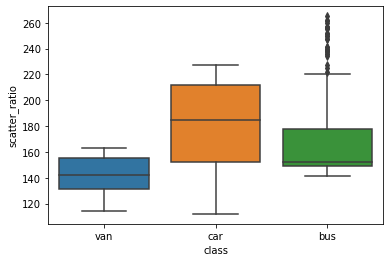

In [ ]:
sns.boxplot(y='scatter_ratio', x='class', data=data)

- There are outliers in case of class Bus scatter_ratio with values more than 220.
- scatter_ratio range in case of Car class is widest, lies between 160 and 218 in most of the cases roughly.
- scatter_ratio for most of the class Van is between roughly 138 and 158.

#### 8. elongatedness	vs   class

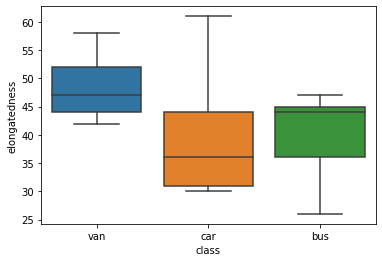

In [ ]:
sns.boxplot(y='elongatedness', x='class', data=data)

- elongatedness range in case of Car class is widest, lies between 32 and 42 in most of the cases roughly.
- elongatedness for most of the class Van is between roughly 45 and 51 and for Bus it's between 36 and 45.

#### 9. pr_axis_rectangularity	vs   class

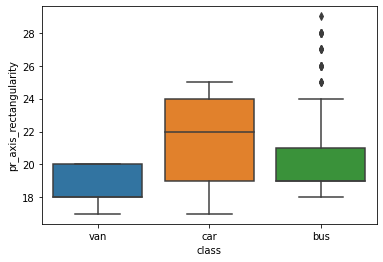

In [ ]:
sns.boxplot(y='pr_axis_rectangularity', x='class', data=data)

- pr_axis_rectangularity range in case of Car class is widest, lies between 19 and 24 in most of the cases roughly.
- pr_axis_rectangularity for most of the class Van is between roughly 18 and 20 and for Bus it's between 19 and 22.
- There are outliers in case of class Bus with values more than 24.

#### 10. max_length_rectangularity	vs   class

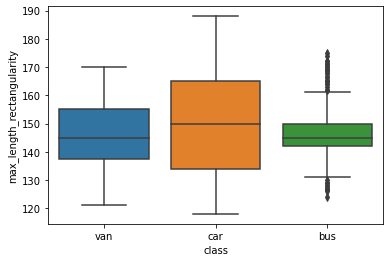

In [ ]:
sns.boxplot(y='max_length_rectangularity', x='class', data=data)

- max_length_rectangularity range in case of Car class is widest, lies between 139 and 162 in most of the cases roughly.
- max_length_rectangularity for most of the class Van is between roughly 139 and 153 and for Bus it's between 142 and 150.
- There are outliers in case of class Bus with values more than 160 and values lower than 130.

#### 11. scaled_variance	vs   class

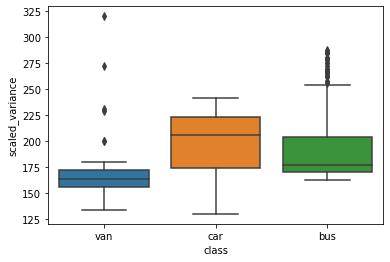

In [ ]:
sns.boxplot(y='scaled_variance', x='class', data=data)

- scaled_variance range in case of Car class is widest, lies between 175 and 202 in most of the cases roughly.
- scaled_variance for most of the class Van is between roughly 150 and 1175 and for Bus it's between 175 and 200.
- There are outliers in case of class Van with values more than 175.

#### 12. scaled_variance_1	vs   class

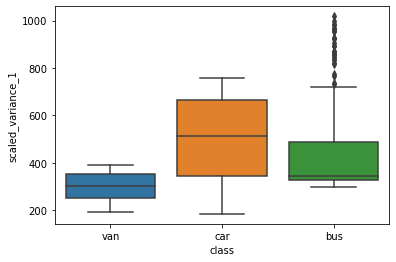

In [ ]:
sns.boxplot(y='scaled_variance_1', x='class', data=data)

- scaled_variance_1 range in case of Car class is widest, lies between 400 and 620 in most of the cases roughly.
- There are outliers in case of class Bus with values more than 700.

#### 13. scaled_radius_of_gyration	vs   class

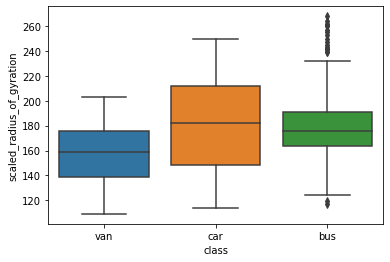

In [ ]:
sns.boxplot(y='scaled_radius_of_gyration', x='class', data=data)

- scaled_radius_of_gyration range in case of Car class is widest, lies between 144 and 178 in most of the cases roughly.
- scaled_radius_of_gyration for most of the class Van is between roughly 140 and 180 and for Bus it's between 170 and 184.
- There are outliers in case of class Bus with values more than 238 and values lower than 120.

#### 14. scaled_radius_of_gyration_1	vs   class

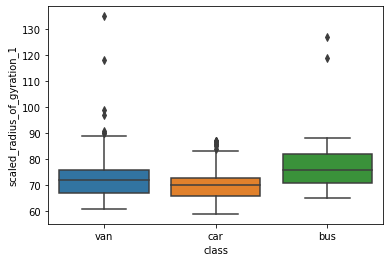

In [ ]:
sns.boxplot(y='scaled_radius_of_gyration_1', x='class', data=data)

- scaled_radius_of_gyration_1 range in case of Bus class is widest, lies between 75 and 85 in most of the cases roughly.
- scaled_radius_of_gyration_1 for most of the class Van is between roughly 69 and 75 and for Car it's between 69 and 72.
- There are few outliers in all three classes for scaled_radius_of_gyration_1 variable.

#### 15. skewness_about	vs   class

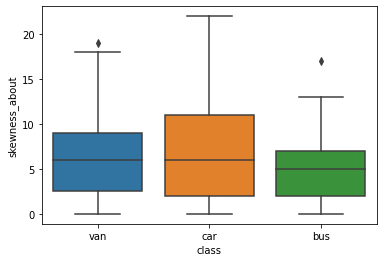

In [ ]:
sns.boxplot(y='skewness_about', x='class', data=data)

- skewness_about range in case of Car class is widest, lies between 3 and 10 in most of the cases roughly.
- skewness_about for most of the class Van is between roughly 3 and 10 and for Bus it's between 3 and 9.
- There are few outliers in case of class Bus and Van.

#### 16. skewness_about_1	vs   class

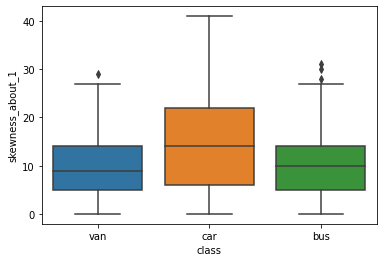

In [ ]:
sns.boxplot(y='skewness_about_1', x='class', data=data)

- skewness_about_1 range in case of Car class is widest, lies between 8 and 22 in most of the cases roughly.
- skewness_about_1 for most of the class Van and Bus is between roughly 7 and 12 .
- There are few outliers in case of class Bus with values more than 29.

#### 17. skewness_about_2	vs   class

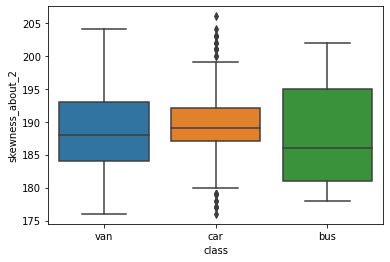

In [ ]:
sns.boxplot(y='skewness_about_2', x='class', data=data)

- skewness_about_2 range in case of Bus class is widest, lies between 182 and 195 in most of the cases roughly.
- skewness_about_2 for most of the class Van is between roughly 185 and 194 and for Car it's between 189 and 192.
- There are outliers in case of class Car with values more than 200 and values lower than 180.

#### 18. hollows_ratio	vs   class

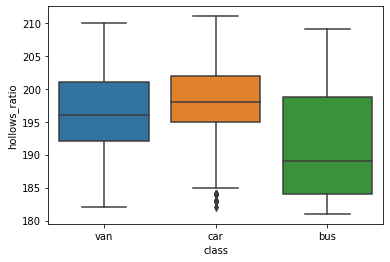

In [ ]:
sns.boxplot(y='hollows_ratio', x='class', data=data)

- hollows_ratio range in case of Bus class is widest, lies between 185 and 196 in most of the cases roughly.
- hollows_ratio for most of the class Van is between roughly 192 and 200 and for Car it's between 1495 and 200.
- There are outliers in case of class Car with values lower than 185.

### Correlation analysis:

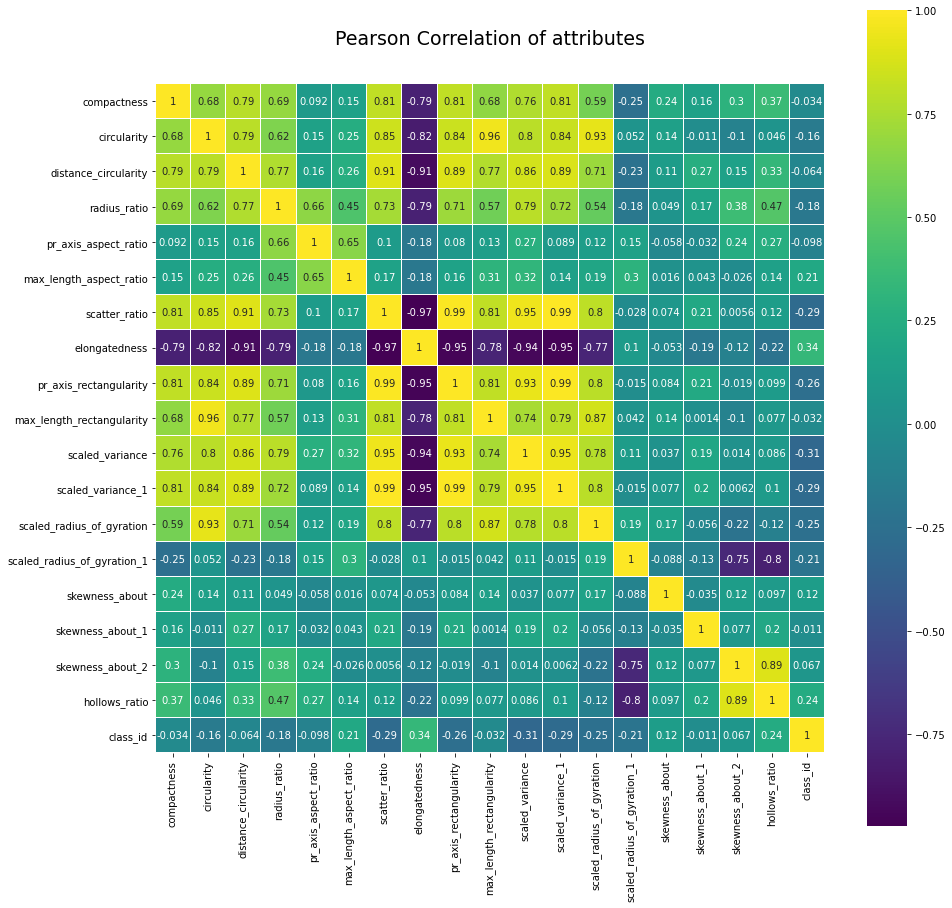

In [ ]:
colormap = plt.cm.viridis # Color range to be used in heatmap
plt.figure(figsize=(15,15))
plt.title('Pearson Correlation of attributes', y=1.05, size=19)
sns.heatmap(data.corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)

- There is good amount of correlation among a few variables
- Most of them idividually are quiet weak predictors

# Model Building using Support Vector Machine

### SVM Model using raw data

In [ ]:
X = data.drop(columns=['class', 'class_id'])
Y = data['class_id']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1, stratify = Y)
svc_raw = svm.SVC(gamma='auto', C=0.5)
svc_raw.fit(x_train , y_train)
svm_raw_y_pred = svc_raw.predict(x_test)
print("Accuracy on training set: {:.2f}".format(svc_raw.score(x_train, y_train)))
print("Accuracy on test set: {:.2f}".format(svc_raw.score(x_test, y_test)))

Accuracy on training set: 0.51
Accuracy on test set: 0.51


### SVM Model using scaled data

#### Convert the features into z scores as we do not know what units / scales were used and store them in new dataframe
- We have seen many variables from the featureset have skewness issue, so applying zscore will normalize data.
- All features have different scales so it's importat to scale all the variables.

In [ ]:
from scipy.stats import zscore

XScaled=X.apply(zscore)


x_train, x_test, y_train, y_test = train_test_split(XScaled, Y, test_size=0.3, random_state=1, stratify = Y)

In [ ]:
svc = svm.SVC(gamma='auto', C=3, probability=True)
svc.fit(x_train , y_train)
svm_y_pred = svc.predict(x_test)
print("Accuracy on training set: {:.2f}".format(svc.score(x_train, y_train)))
print("Accuracy on test set: {:.2f}".format(svc.score(x_test, y_test)))

Accuracy on training set: 0.99
Accuracy on test set: 0.97


### Lets check the confusion matrix and classification report

Confusion Matrix
[[ 63   0   2]
 [  0 124   5]
 [  0   1  59]]


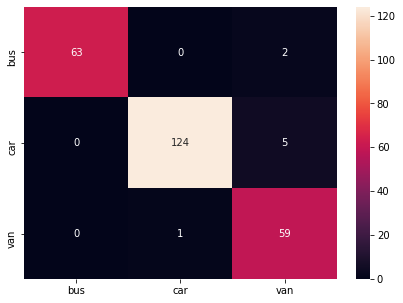

In [ ]:
print("Confusion Matrix")
cm=metrics.confusion_matrix(y_test, svm_y_pred)
print(cm)
df_cm = pd.DataFrame(cm, index = [i for i in ["bus","car","van"]],
                  columns = [i for i in ["bus","car","van"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

In [ ]:
print("SVM Classification Report")

print(metrics.classification_report(y_test, svm_y_pred,target_names=['Bus', 'Car', 'Van']))
#print(classification_report(y_test, y_pred, target_names=['Class 1', 'Class 2', 'Class 3']))
print("Precision Score: ",metrics.precision_score(y_test, svm_y_pred, average='macro'))
print("Recall Score: ",metrics.recall_score(y_test, svm_y_pred, average='macro'))


SVM Classification Report
              precision    recall  f1-score   support

         Bus       1.00      0.97      0.98        65
         Car       0.99      0.96      0.98       129
         Van       0.89      0.98      0.94        60

    accuracy                           0.97       254
   macro avg       0.96      0.97      0.97       254
weighted avg       0.97      0.97      0.97       254

Precision Score:  0.961979797979798
Recall Score:  0.9712681375472073


### Cross-Validation with K_fold=10

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(XScaled, Y, test_size=0.30, random_state=1)

num_folds = 10
seed = 1

kfold = KFold(n_splits=num_folds, random_state=seed)
model = svm.SVC(gamma='auto', C=3)
results = cross_val_score(model, XScaled, Y, cv=kfold)
print(results)
print("Model Accuracy: %.3f%% +-(%.3f%%)" % (results.mean()*100.0, results.std()*100.0))

[0.96470588 0.96470588 0.95294118 1.         1.         0.97647059
 0.98809524 0.98809524 0.97619048 0.97619048]
Model Accuracy: 97.874% +-(1.469%)


## SVM Model using PCA: Dimensionality Reduction

In [ ]:
from sklearn.decomposition import PCA


pca7 = PCA(n_components=7)
pca7.fit(XScaled)

Xpca3 = pca7.transform(XScaled)
x_train, x_test, y_train, y_test = train_test_split(Xpca3, Y, test_size=0.3, random_state=1, stratify = Y)

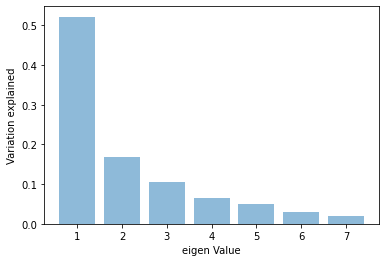

In [ ]:
plt.bar(list(range(1,8)),pca7.explained_variance_ratio_,alpha=0.5, align='center')
plt.ylabel('Variation explained')
plt.xlabel('eigen Value')
plt.show()

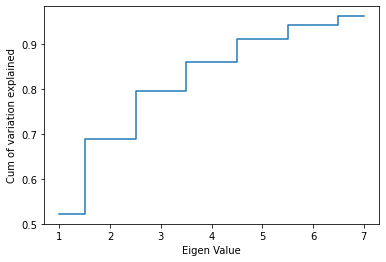

In [ ]:
plt.step(list(range(1,8)),np.cumsum(pca7.explained_variance_ratio_), where='mid')
plt.ylabel('Cum of variation explained')
plt.xlabel('Eigen Value')
plt.show()

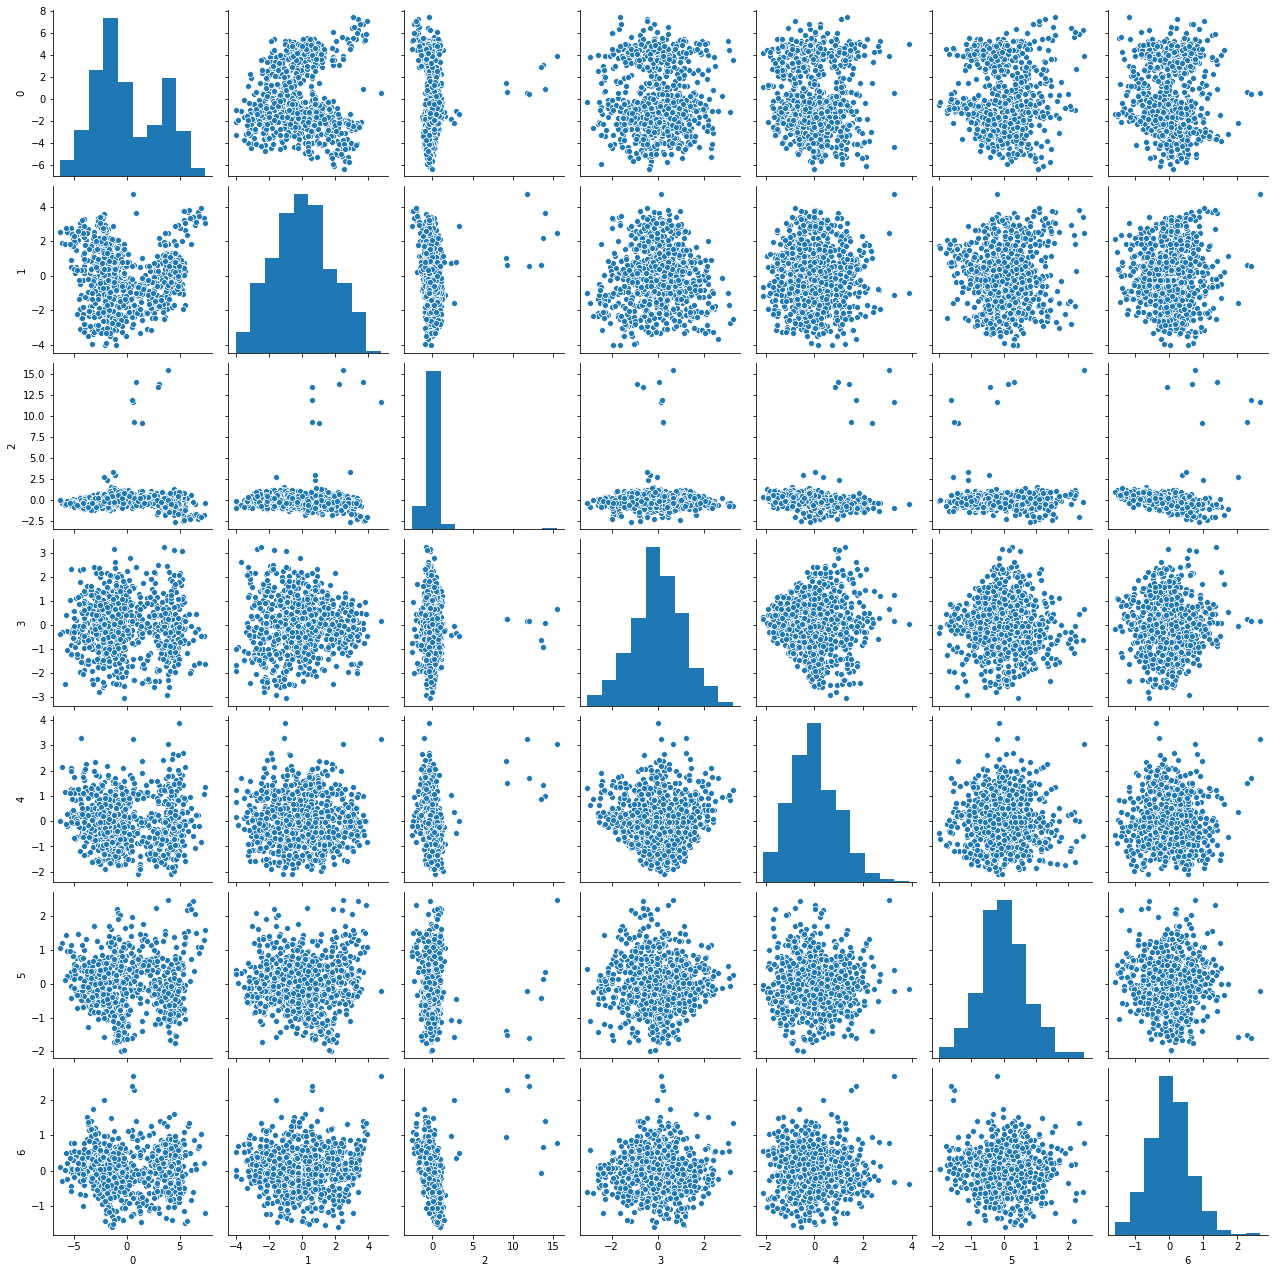

In [ ]:
sns.pairplot(pd.DataFrame(Xpca3))

In [ ]:
print("Variance explained by the PCA: {:.2f}".format(pca7.explained_variance_ratio_.sum()))

Variance explained by the PCA: 0.96


#### Applying PCA with no. of componenets value 7, the variance explained is 96% and with 6 componenets it is 94% so selecting n_components = 7.

In [ ]:
pca_svc = svm.SVC(gamma='auto', C=3)
pca_svc.fit(x_train , y_train)

print("Accuracy on training set: {:.2f}".format(pca_svc.score(x_train, y_train)))
print("Accuracy on test set: {:.2f}".format(pca_svc.score(x_test, y_test)))

Accuracy on training set: 0.98
Accuracy on test set: 0.90


### Lets check the confusion matrix and classification report

Confusion Matrix


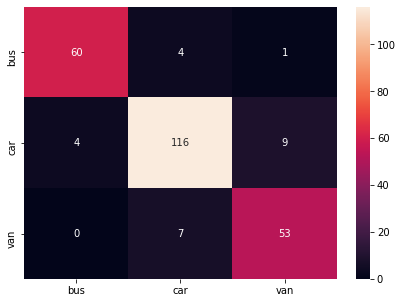

In [ ]:
pca_y_pred = pca_svc.predict(x_test)
print("Confusion Matrix")
cm=metrics.confusion_matrix(y_test, pca_y_pred)
df_cm = pd.DataFrame(cm, index = [i for i in ["bus","car","van"]],
                  columns = [i for i in ["bus","car","van"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

In [ ]:

print("SVM Classification using PCA Report")

print(metrics.classification_report(y_test, pca_y_pred))
print("Precision Score: ",metrics.precision_score(y_test, pca_y_pred, average='macro'))
print("Recall Score: ",metrics.recall_score(y_test, pca_y_pred, average='macro'))


SVM Classification using PCA Report
              precision    recall  f1-score   support

           0       0.94      0.92      0.93        65
           1       0.91      0.90      0.91       129
           2       0.84      0.88      0.86        60

    accuracy                           0.90       254
   macro avg       0.90      0.90      0.90       254
weighted avg       0.90      0.90      0.90       254

Precision Score:  0.8973852226804984
Recall Score:  0.9018783542039356


### Cross-validation with k-fold=10

In [ ]:
num_folds = 10
seed = 1

kfold = KFold(n_splits=num_folds, random_state=seed)
model = svm.SVC(gamma='auto', C=3)
results = cross_val_score(model, Xpca3, Y, cv=kfold)
print(results)
print("Model Accuracy using PCA: %.3f%% with +-(%.3f%%)" % (results.mean()*100.0, results.std()*100.0))

[0.94117647 0.94117647 0.91764706 0.91764706 0.94117647 0.96470588
 0.95238095 0.91666667 0.96428571 0.91666667]
Model Accuracy using PCA: 93.735% with +-(1.837%)


## Conclusion: 
### In this classification problem we have given given silhouette as one of three types of vehicle, using a set of features extracted from the silhouette. The vehicle may be viewed from one of many different angles. This is multiclass problem with threee different classes as : Car,  Bus, Van.

### The objective is to apply dimensionality reduction technique – PCA and train a model using principle components and training the model using just the raw data and compare.

### We reduced the dimensions to seven from eighteen using Principal Component Analysis which explains variance 96% of the original data; with reduced dimensions the accuracy score is between 91.90% - 95.57%.
### The model built using scaled data with original dimensions is giving accuracy between 96.40% -  99.34%, which is clearly performing better compared to the model built after dimensionality reduction. 
### So overall we see just around 4% acuracy drop with using just 7 dimensions out of 18. Another added advantage is with 7 independent variable is likely to do better since that would be less of an over-fit.